In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle


In [2]:
from sys import path
#path.append('./../spineSimulator/')
path.append('./../')
import spineSimulator

In [3]:
import pandas
run_id = 0
########################################################
df = pandas.read_excel('./../simulation_parameters.xlsx')
results_file = './../../simulation_results/experiment_' + str(run_id)

T = df.loc[0, run_id]
delta_t = df.loc[1, run_id]
L = df.loc[2, run_id]
n_h = df.loc[3, run_id]
n_hnj = df.loc[4, run_id]
n_n = df.loc[5, run_id]
n_ndj = df.loc[6, run_id]
n_d = df.loc[7, run_id]
nx = n_h + n_hnj + n_n + n_ndj + n_d
a_h = df.loc[8, run_id]
a_n = df.loc[9, run_id]
a_d = df.loc[10, run_id]
input_type = df.loc[11, run_id]
constants = df.loc[12, run_id]
write_interval = df.loc[13, run_id]
bc_times = [float(v) for v in df.loc[14, run_id].split(',')]
bc_vN_vals = [float(v) for v in df.loc[15, run_id].split(',')]
bc_dir_vals = [float(v) for v in df.loc[16, run_id].split(',')]

boundary_conditions = [bc_times,
          bc_vN_vals,
          bc_dir_vals]

t = spineSimulator.get_t(T, delta_t)
x = spineSimulator.get_x(L, nx)
a = spineSimulator.get_a(n_h, n_hnj, n_n, n_ndj, n_d, nx, a_h, a_n, a_d)

FileNotFoundError: [Errno 2] No such file or directory: './../simulation_parameters.xlsx'

array([2.5e-07, 2.5e-07, 2.5e-07, 2.5e-07, 2.5e-07, 3.5e-08, 3.5e-08,
       3.5e-08, 3.5e-08, 3.5e-08, 4.0e-07, 4.0e-07, 4.0e-07, 4.0e-07])

# Init simulation

In [22]:
#reload(FiniteDifferenceSolver)
spine = spineSimulator.FiniteDifferenceSolver(
    t,x,a,
    bnds=boundary_conditions,
    input_type=input_type,
    file_name=results_file, 
    write_interval=write_interval,
    parameter_set = constants)

Strength of input current: 25.0 pA
Writing results to file every 1000 steps.
Writing results to file every 1e-07 seconds.
Writing results at 0.0 ms


array([9.01457727e+05, 1.80291545e+06, 2.70437318e+06, 3.60583091e+06,
       4.50728864e+06, 2.79543881e+07, 7.39471293e+07, 1.19939870e+08,
       1.65932612e+08, 2.11925353e+08, 2.35097789e+08, 2.35449921e+08,
       2.35802053e+08, 2.36154185e+08, 2.36506317e+08])

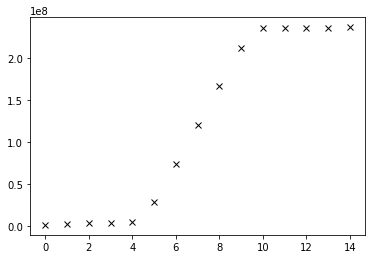

In [23]:
_r_e = spine.r_e / spine.scale_resistance / spine.scale_space
_a = spine.a/spine.scale_space
_dx = spine.delta_x/spine.scale_space
R_e = _r_e * _dx / np.pi / np.square(_a)
#_g_ij = (np.square(_a[1:]) / _r_e[1:] + np.square(_a[:-1]) / _r_e[:-1]) * np.pi / 2. / _dx
_g_ij = (2. * (np.square(_a[1:]) * np.square(_a[:-1])) / 
         (_r_e[1:]*np.square(_a[1:])+_r_e[:-1]*np.square(_a[:-1])) / _dx * np.pi )
plt.plot(np.cumsum(1./_g_ij), 'kx')
np.cumsum(1./_g_ij)

# estimate stability

In [24]:
# STABILTY ANALYSIS
# all numbers have to be smaller 0.5
# then a stable solution can be expected
print(spine.const_q*spine.a/2*spine.gamma() * spine.g_k('all')*spine.delta_t/spine.delta_x**2)
print(spine.gamma() * spine.h_k('K')*spine.delta_t/spine.delta_x**2)
print(spine.delta_k('K') * spine.g_k('all')*spine.delta_t/spine.delta_x**2)
print(spine.delta_k('K') * spine.h_k('K')*spine.delta_t/spine.delta_x**2)

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Run simulation and write our results

In [25]:
import time
start_time = time.time()
spine.solve()
end_time = time.time()
time_taken = end_time - start_time
time_taken, 'seconds'

Writing results at 9.999999999999999e-05 ms
Writing results at 0.00019999999999999998 ms
Writing results at 0.0003 ms
Writing results at 0.00039999999999999996 ms
Writing results at 0.0005 ms
Writing results at 0.0006 ms
Writing results at 0.0007000000000000001 ms
Writing results at 0.0007999999999999999 ms
Writing results at 0.0009000000000000001 ms
Writing results at 0.001 ms
Writing results at 0.0011 ms
Writing results at 0.0012 ms
Writing results at 0.0013 ms
Writing results at 0.0014000000000000002 ms
Writing results at 0.0015 ms
Writing results at 0.0015999999999999999 ms
Writing results at 0.0017000000000000001 ms
Writing results at 0.0018000000000000002 ms
Writing results at 0.0019 ms
Writing results at 0.002 ms
Writing results at 0.0021000000000000003 ms
Writing results at 0.0022 ms
Writing results at 0.0023 ms
Writing results at 0.0024 ms
Writing results at 0.0025 ms
Writing results at 0.0026 ms
Writing results at 0.0027 ms
Writing results at 0.0028000000000000004 ms
Writing 

(11.464414596557617, 'seconds')

In [26]:
# time for 1 ms simulation in hours
time_taken * 1.e-3 / T / 3600

0.3184559610154893

(101, 16)


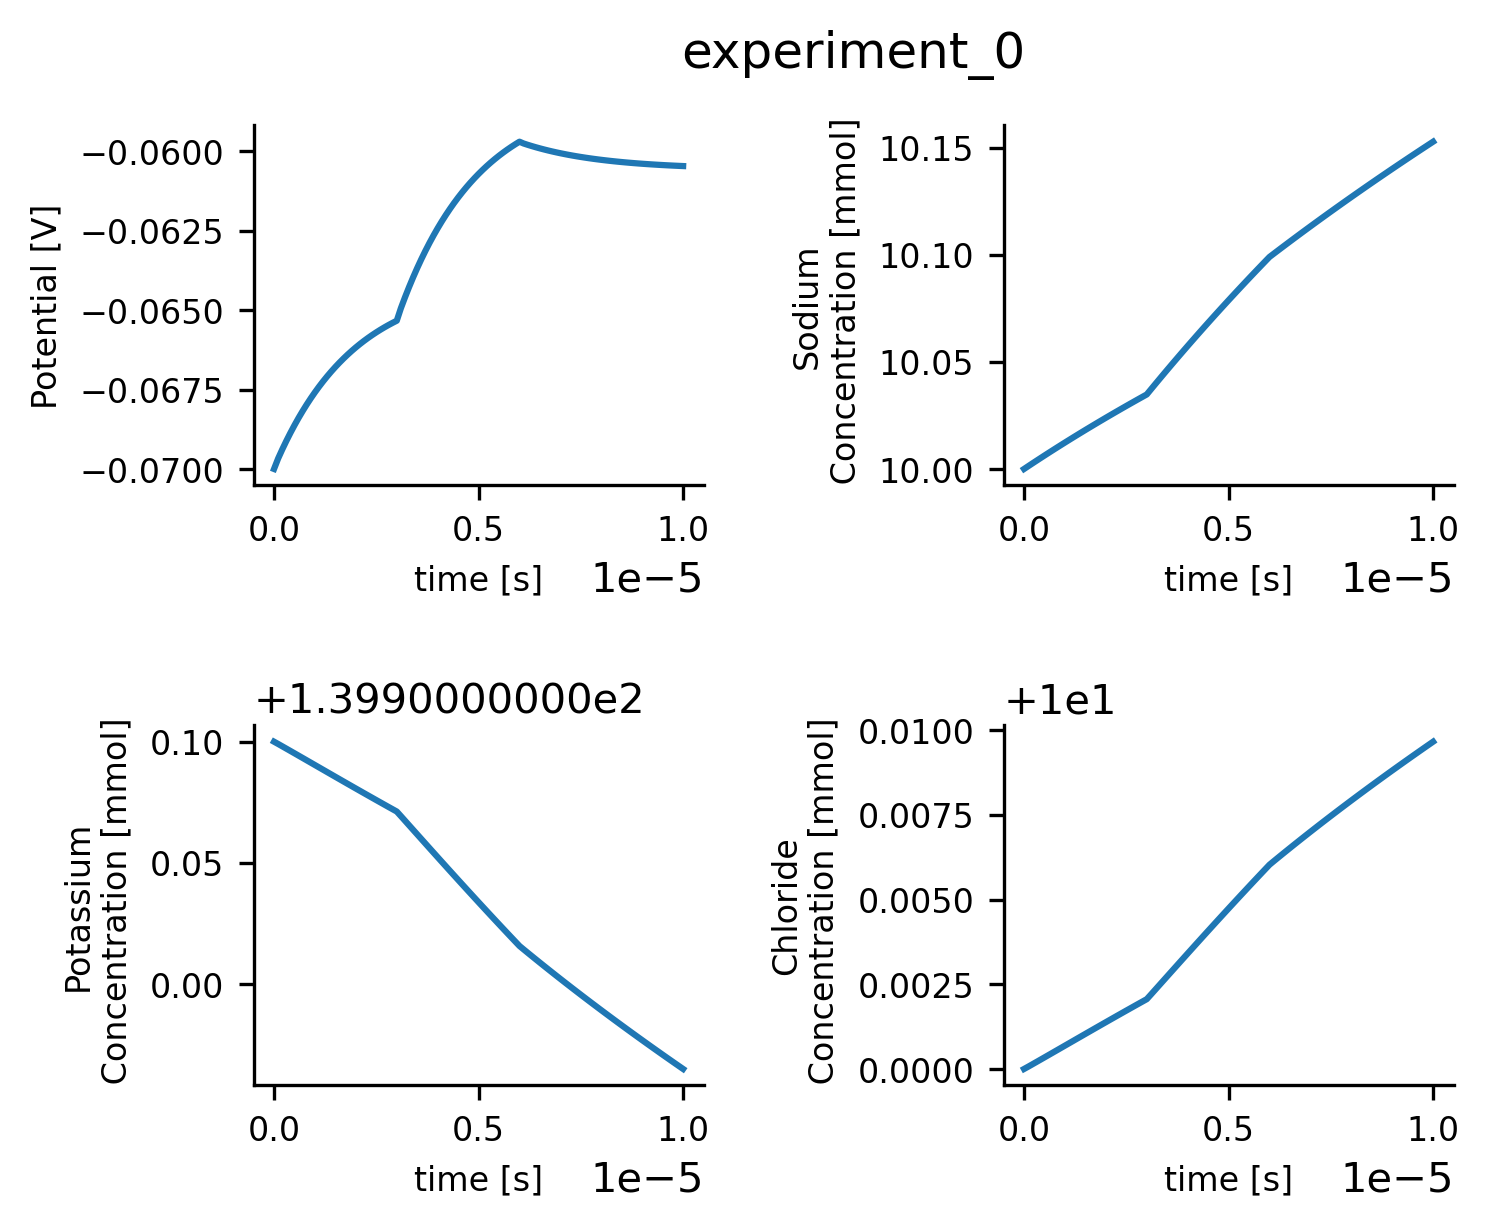

In [5]:
spineSimulator.figure_head_overview('experiment_0')

# Show results

In [10]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a / 2. / spine.const_c_m

array([6.59014019e+02, 6.07066317e+00, 5.99034178e+00, 5.90994703e+00,
       5.82952218e+00, 5.74907828e+00, 5.14136721e+00, 4.01021357e+00,
       2.87901561e+00, 1.74778546e+00, 6.16535495e-01, 4.52694790e-02,
       3.39521543e-02, 2.26347910e-02, 1.13174019e-02, 0.00000000e+00])

In [166]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a**2 * np.pi

array([2.38864929e-14, 2.38864929e-14, 2.38123954e-14, 2.36641978e-14,
       2.34418954e-14, 2.32664772e-14, 4.55630872e-15, 3.44520827e-15,
       2.33378928e-15, 1.22206251e-15, 1.22312322e-16, 6.95537537e-16,
       5.56429867e-16, 4.17319115e-16, 2.78217226e-16, 1.39109399e-16,
       0.00000000e+00])

In [167]:
(spine.phi-spine.const_phi_rest) * 2. * np.pi * spine.a * spine.const_c_m

array([2.38864927e-14, 2.38864927e-14, 2.38123953e-14, 2.36641978e-14,
       2.34418953e-14, 2.32664772e-14, 4.55630870e-15, 3.44520827e-15,
       2.33378929e-15, 1.22206251e-15, 1.22312253e-16, 6.95541257e-16,
       5.56434015e-16, 4.17326252e-16, 2.78217985e-16, 1.39109232e-16,
       0.00000000e+00])

In [158]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a**2 * np.pi

array([2.39000206e-14, 2.39000206e-14, 2.38258349e-14, 2.36774634e-14,
       2.34549041e-14, 2.32792599e-14, 4.55876019e-15, 3.44659298e-15,
       2.33441610e-15, 1.22223016e-15, 1.22313457e-16, 6.95546343e-16,
       5.56437240e-16, 4.17326918e-16, 2.78213070e-16, 1.39104439e-16,
       0.00000000e+00])

In [159]:
(spine.phi-spine.const_phi_rest) * 2. * np.pi * spine.a * spine.const_c_m

array([2.39000205e-14, 2.39000205e-14, 2.38258350e-14, 2.36774634e-14,
       2.34549042e-14, 2.32792599e-14, 4.55876019e-15, 3.44659298e-15,
       2.33441610e-15, 1.22223016e-15, 1.22313458e-16, 6.95546296e-16,
       5.56437040e-16, 4.17327783e-16, 2.78218524e-16, 1.39109263e-16,
       0.00000000e+00])

In [100]:
k_B = 1.381e-23  # Boltzmann constant [k_B] = m^2 kg s^-2 K^-1
e = 1.602e-19  # elementary charge [e] = C
T = 310
k_B * T / e * np.log(6.89803959/ 6.022) 

0.003629523629207271

In [116]:
0.8 * spine.const_q * spine.a / 2. / spine.const_c_m / spine.scale_voltage

array([1.602   , 1.602   , 1.602   , 1.602   , 1.602   , 1.605204,
       0.3204  , 0.3204  , 0.3204  , 0.3204  , 0.323604, 2.5632  ,
       2.5632  , 2.5632  , 2.5632  , 2.5632  , 2.5632  ])

# RUN on CNS-Servers

In [5]:
from sys import path
path.append('/home/work/Projects/tof_cam/apisBlue/scripts/')
import sshHandler

In [13]:
steinbeck = '10.153.169.22'
beckett = '10.153.169.180'
client = sshHandler.RemoteClient(
    host =  steinbeck,
    user = 'eberhardt', 
    password = 'timsP0W4BZM', 
    ssh_key_filepath='/home/work/.ssh/', 
    ssh_key_filename= "id_rsa_atlas",
    connect_by='password', # "password" or "key"
)

client created:  10.153.169.22


In [14]:
client.get_ssh_key()
client.ssh_key.get_base64()

'AAAAB3NzaC1yc2EAAAADAQABAAABgQC2NvAwIFbiTsMGjDWwWpviR1vv5kgqreOIWovgfvxHz53HeV4j0RYMcfpF8ItUuue+mtW3SyE8r6itdO4uMumWSEfYtL0hunCMpuqESeOUW7DPnEUNBc7G0GxCs+kh2227S0XnUgJzdsV2efIpbPnudX+fmcQZgH1S2rHHrxJLX56jZJiq31D5VghLVfcHClAFW31tkl4iAUuLtMvZGBnjo5h7mc1uX01jT6y/jL9Zd8cezJfOioeYNHToXDIz1pe6EVBeL8mH6GzK4PdqKFZA02VadTBqWEYsvUgu4kb0gCKYlB9NSQOWlJkePA+Nun1vZV7nq9nbZo0VZoe9Fk6OCJJcYeuID1H2gflBbve4QxnMqtxc3wUqyDYWPiV5z2H0Hfwwcf4Pv1R4RH9Z29ms0CLYBRHSh19XOkc4utC5ptorUH5D69nNHdFlnLL+lrnSXuLT/xi/bdQoEX/lwoiuE1Zr9wjv3Zi6tTyo2wsJxQmc/As23eNqnYeESmtK9WU='

In [15]:
client.connect()

In [16]:
client.connect_scp()

### Copy latest code on servers

In [17]:
files = [
    'constants.py',
    '__init__.py',
    'simulation_parameters.py',
    'FiniteDifferenceSolver.py',  
    'run.py',
    

]
local_path = '/home/work/Projects/spineCableSimulation/code/spineSimulator/'
local_files = [local_path + f for f in files]
remote_path = '/home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/'
client.file_upload(local_path=local_files, remote_path=remote_path)
client.file_upload([local_path +  '../simulation_parameters.xls'],remote_path+'../')


print(local_files)

['/home/work/Projects/spineCableSimulation/code/spineSimulator/constants.py', '/home/work/Projects/spineCableSimulation/code/spineSimulator/__init__.py', '/home/work/Projects/spineCableSimulation/code/spineSimulator/simulation_parameters.py', '/home/work/Projects/spineCableSimulation/code/spineSimulator/FiniteDifferenceSolver.py', '/home/work/Projects/spineCableSimulation/code/spineSimulator/run.py']


### run simulations

In [18]:
run_path = '/home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/'
py_file = 'run' #.py

cmd1 = 'cd {p}; chmod +x {f}.py'.format(p=run_path, f=py_file)       
print(cmd1)
stdout = client.execute_command(cmd1)
print(stdout)

for sim_id in range(40,52):
    run_file = py_file + str(sim_id)
    # copy file
    cmd2 = 'cp {run_path}{pf}.py {run_path}{rf}.py'.format(pf=py_file, rf=run_file, run_path=run_path)
    print(cmd2)
    stdout = client.execute_command(cmd2)
    print(stdout)


    process_name = str(sim_id)
    args = str(sim_id)
    client.start_background_process(path=run_path, file_name=run_file+'.py', 
                                    name=process_name, run_argv=args, log_output=True)

    cmd3 = 'rm {run_path}{rf}.py'.format(rf=run_file, run_path=run_path)
    print(cmd3)
    stdout = client.execute_command(cmd3)
    print(stdout)

cd /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/; chmod +x run.py
[]
cp /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/run.py /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/run40.py
[]
cd /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/; nohup ./run40.py 40 &> nohup_40.out & echo "$!" &
received from channels:  b'3405\n'
rm /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/run40.py
[]
cp /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/run.py /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/run41.py
[]
cd /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/; nohup ./run41.py 41 &> nohup_41.out & echo "$!" &
received from channels:  b'3503\n'
rm /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/run41.py
[]
cp /home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/run.py /home/eberhardt/Projects/spineCableSimulation/code/s

In [8]:
# kill process by name
#client.kill_process_by_name('run1.py')

[]


In [19]:
# check if process with a certain name is running
for i in range(40,52):
    cmd = 'ps -C run{i}.py'.format(i=i)
    stdout = client.execute_command(cmd)
    print(i, stdout)

40 ['  PID TTY          TIME CMD\n', ' 3405 ?        00:00:14 run40.py\n']
41 ['  PID TTY          TIME CMD\n', ' 3503 ?        00:00:11 run41.py\n']
42 ['  PID TTY          TIME CMD\n', ' 3600 ?        00:00:11 run42.py\n']
43 ['  PID TTY          TIME CMD\n', ' 3698 ?        00:00:10 run43.py\n']
44 ['  PID TTY          TIME CMD\n', ' 3796 ?        00:00:09 run44.py\n']
45 ['  PID TTY          TIME CMD\n', ' 3889 ?        00:00:08 run45.py\n']
46 ['  PID TTY          TIME CMD\n', ' 3983 ?        00:00:07 run46.py\n']
47 ['  PID TTY          TIME CMD\n', ' 4080 ?        00:00:07 run47.py\n']
48 ['  PID TTY          TIME CMD\n', ' 4179 ?        00:00:07 run48.py\n']
49 ['  PID TTY          TIME CMD\n', ' 4277 ?        00:00:06 run49.py\n']
50 ['  PID TTY          TIME CMD\n', ' 4373 ?        00:00:05 run50.py\n']
51 ['  PID TTY          TIME CMD\n', ' 4471 ?        00:00:04 run51.py\n']


In [8]:
# get results 
def download_results(i):
    print('download results file ', i)

    files = [
        'experiment_{i}.bak'.format(i=i),
        'experiment_{i}.dat'.format(i=i),
        'experiment_{i}.dir'.format(i=i),
    ]
    local_path = '/home/work/Projects/spineCableSimulation/simulation_results/'
    remote_path = '/home/eberhardt/Projects/spineCableSimulation/simulation_results/'
    remote_files = [remote_path + f for f in files]

    client.download_file(remote_path=remote_files, local_path=local_path)
    
for i in range(11,12):
    download_results(i)

download results file  11


In [14]:
# download logfile
for i in range(10):
    files = [
        'nohup_{i}.out'.format(i=i),
    ]
    local_path = '/home/work/Projects/spineCableSimulation/simulation_results/'
    remote_path = '/home/eberhardt/Projects/spineCableSimulation/code/spineSimulator/'
    remote_files = [remote_path + f for f in files]

    client.download_file(remote_path=remote_files, local_path=local_path)

In [ ]:
nohup some_command &> nohup2.out &